<a href="https://colab.research.google.com/github/peternann/DupsBegone/blob/master/notebooks/module-3/3.2_OptusU_AIB_Module_3_Multi_Categorical_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modelling - Multi-Classification (Categorical Prediction - Multiple Classes)

In this notebook, we use supervised machine learning algorithms to solve a  classification type prediction problem. To improve the quality of learning outcomes, we use a benchmark dataset, [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) to learn to classify input variables (sepallength, sepalwidth,petallength, petalwidth) into one of three classes in the 'class' variable (Iris Setosa, Iris Versicolour, Iris Virginica). 

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In this next section we are going to import some libraries that are frequently usedin AI and Machine Learning.

In the example given below you can see that we use the `import` keyword to load the library into our program. We make use of the `as` keyword to provide a shortcut `alias` for us to refer to the library in the program. Think of it as a shorthand notation.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from xgboost import plot_tree

# Tools for visualisation
import seaborn as sns
# install shap explainability
!pip install shap
import shap

     |████████████████████████████████| 356 kB 6.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=fd5a2f7f10a3413afd5a4d505992603cd2fcb595f8cadcfa75ff89f4fd5479f3
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command. 

*   Installing python libraries :
``` !pip install {library_name} ```
*   Installing system packages :
``` !apt-get install {package_name} ```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Preparing the data

The IRIS dataset is described [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) 

This dataset is preloaded to the scikit-learn library, where it can be directly accessed using this line of code - iris_dataset = datasets.load_iris()

But we will upload the dataset so that we learn how that works on Colab. 
*   Download the iris.csv file from GitHub.
*   Click on the "Files" icon on the left menu bar, and then "upload to session storage", select the file that you downloaded. 
*   Click OK to close the pop-up warning on session storage.
*   Now you should see the file appear on the same window. 
* Load this dataset into this program using the following function in the Pandas library.
*  The second function previews the first five lines of the dataset.

* Notice how comments that explain the code have been inserted into the code block using the #  symbol. 

In [ ]:
#Load the CSV file containing the dataset.
iris_dataset = pd.read_csv("iris.csv")
#Preview the first 5 lines of the loaded data
iris_dataset.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data exploration

Datasets are converted to dataframes when working with Pandas. Pandas provides functions and attributes which allow you to work with the data in the dataframe. The most frequently used are,

* Dataframe functions (df.method())

  * head( [n] ), tail( [n] ) - first/last n rows
  * describe() - generate descriptive statistics (for numeric columns only)
  * max(), min() - return max/min values for all numeric columns
  * mean(), median() - return mean/median values for all numeric columns
  * std() - standard deviation
  * sample([n]) - returns a random sample of the data frame
  * dropna() - drop all the records with missing values

* Pandas dataframe attibutes (df.attribute)

  * dtypes - list the types of the columns
  * columns - list the column names
  * axes - list the row labels and column names
  * ndim - number of dimensions
  * size - number of elements
  * shape - return a tuple representing the dimensionality
  * values - numpy representation of the data

In [ ]:
#view data types
iris_dataset.info()
#view basic stats
iris_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data visualisation

Now let's visualise the dataset using the Seaborn library. 

Matplotlib is the "standard" data viz library in Python. Although Seaborn is based on Matplotlib, it can be used to create graphs using a single line instead of multiple lines in Matplotlib. 

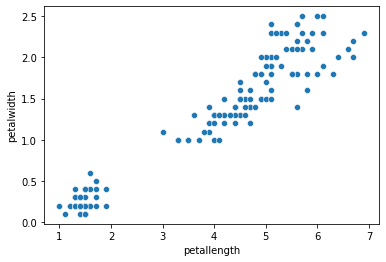

In [ ]:
sns.scatterplot(x='petallength', y='petalwidth', data=iris_dataset)

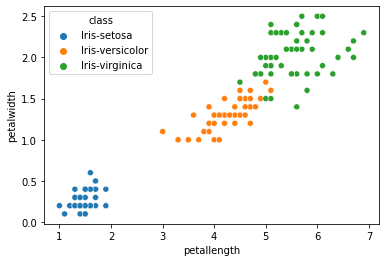

In [ ]:
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=iris_dataset)

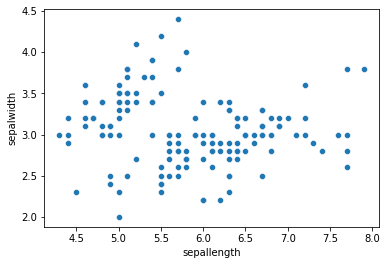

In [ ]:
sns.scatterplot(x='sepallength', y='sepalwidth', data=iris_dataset)

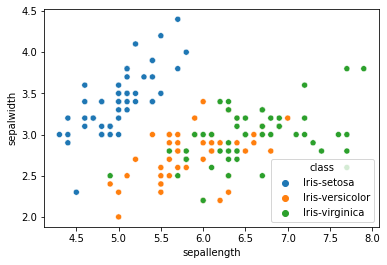

In [ ]:
sns.scatterplot(x='sepallength', y='sepalwidth', hue='class', data=iris_dataset)

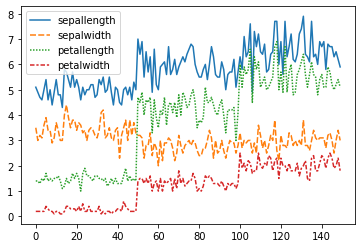

In [ ]:
sns.lineplot(data=iris_dataset)

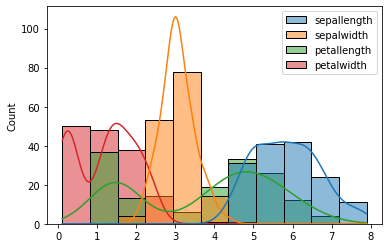

In [ ]:
sns.histplot(data=iris_dataset, kde=True)

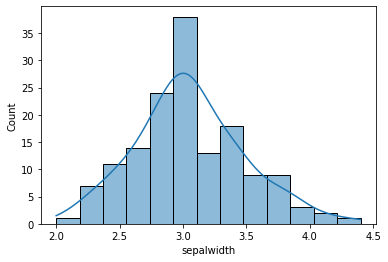

In [ ]:
sns.histplot(data=iris_dataset, x='sepalwidth', kde=True)

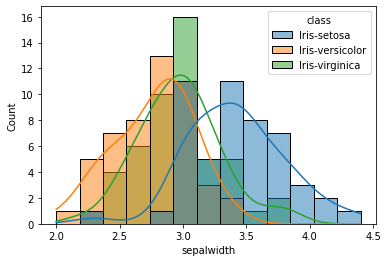

In [ ]:
sns.histplot(data=iris_dataset, x='sepalwidth', hue="class", kde=True)

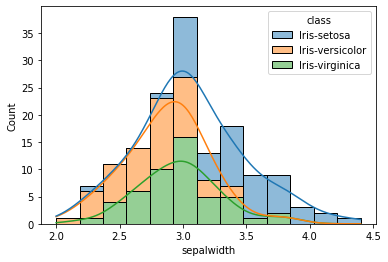

In [ ]:
sns.histplot(data=iris_dataset, x='sepalwidth', hue="class", kde=True, multiple="stack")

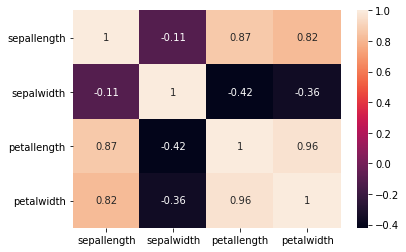

In [ ]:
corr_matrix = iris_dataset.corr()
sns.heatmap(corr_matrix, annot=True)

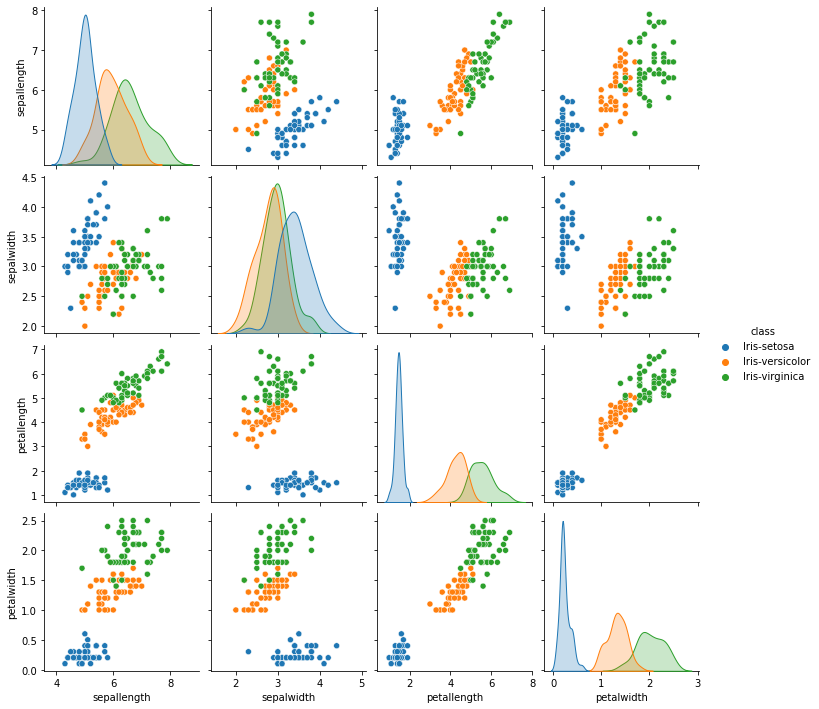

In [ ]:
sns.pairplot(data=iris_dataset, hue = 'class')

## Building the models

In [ ]:
# Separating input variables from the output variable.
X = iris_dataset[['sepallength','sepalwidth','petallength','petalwidth']]
y = iris_dataset[['class']]

# "Splitting" the dataset into train 80% and test 20% (we are using the holdout method and foregoing validation in this instance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

y.value_counts()

y_test.value_counts()

class          
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64

class          
Iris-virginica     10
Iris-versicolor    10
Iris-setosa        10
dtype: int64

In [ ]:
#Logistic regression 
irisLogReg = LogisticRegression()
#fit the model on the training data
irisLogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Decision tree 
irisDecisionTree = tree.DecisionTreeClassifier()
irisDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# K-nearest neighbour 
irisKNN = neighbors.KNeighborsClassifier()
irisKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# XGBoost 
irisXGB = xgb.XGBClassifier()
irisXGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Neural network - Multi-layer Perceptron
irisMLP = MLPClassifier()
irisMLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Model evaluation

In [ ]:
#raw output generated by the score() function
print(irisLogReg.score(X_test, y_test))

#formatted output 
print('Accuracy of Logistic Regression : ', (round(irisLogReg.score(X_test, y_test),2)))
print('Accuracy of Decision Tree : ' , (round(irisDecisionTree.score(X_test, y_test),2)))
print('Accuracy of KNN : ' , (round(irisKNN.score(X_test, y_test),2)))
print('Accuracy of XGBoost : ' , (round(irisXGB.score(X_test, y_test),2)))
print('Accuracy of MLP : ' , (round(irisMLP.score(X_test, y_test),2)))

0.9666666666666667
Accuracy of Logistic Regression :  0.97
Accuracy of Decision Tree :  0.97
Accuracy of KNN :  1.0
Accuracy of XGBoost :  0.93
Accuracy of MLP :  0.97


In [ ]:
#classification report
y_predict = irisLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


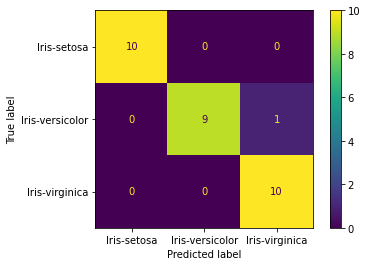

In [ ]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(irisLogReg, X_test,y_test)

## Using the model

In [ ]:
iris_NewData_1 = [[5.1,	3.5,	1.4,	0.2]] #Iris-setosa

iris_NewData_2 = [[7, 3.2, 4.7,	1.4]] #Iris-versicolor

iris_NewData_3 = [[7, 3, 4,	2]] #Iris-virginica (or not) swap 4 - 5

irisLogReg.predict(iris_NewData_3)

array(['Iris-versicolor'], dtype=object)

## Model explainability 

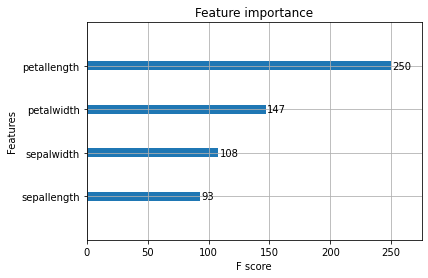

In [ ]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(irisXGB)

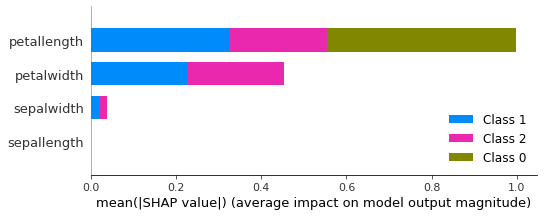

In [ ]:
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(irisDecisionTree)  #!pip install shap import shap
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)